<a href="https://colab.research.google.com/github/Arielnasc/Estudos/blob/main/R_EFICA_(curso).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Psicometria: Straight to the point
## Por Luis Anunciação (PUC-Rio)

Este google colab é relacionado ao curso "Psicometria: Straight to the point", por Luis Anunciação. A sintaxe abaixo descreve parte do processo analítico realizado no artigo "Psychometric properties and clinical utility of the executive function inventory for children and adolescents: a large multistage populational study including children with ADHD". 



#Base de dados

Você precisará carregar a base de dados disponibilizada em https://osf.io/g4afx/download (efica_ds_processed.csv) e em https://osf.io/hzx8v/download (efica_ds_full_processed.csv) para a pasta content/sample_data. É um processo muito simples. basta clicar em arrastar. Todas as análises psicométricas serão feitas na efica_ds_processed. As análises de grupos contrastantes serão feitas na efica_full. Essa escolha de análises foi para facilitar a compreensão do conteúdo do curso.

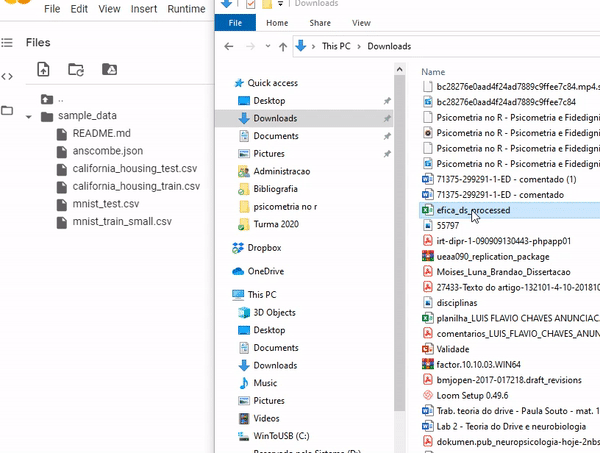

# Instalar pacotes

É necessário que você instale os pacotes abaixo para realizar as ações propostas. Apesar de ser um procedimento simples, a instalação costuma levar alguns minutos.

In [ ]:
install.packages("psych", repos = "http://cran.rstudio.com/")
install.packages("lavaan", repos = "http://cran.rstudio.com/")
install.packages("semTools", repos = "http://cran.rstudio.com/")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘tmvnsim’, ‘mnormt’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘pbivnorm’, ‘numDeriv’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Carregar pacotes

Uma vez que os pacotes foram instalados, você irá precisar carregar estes pacotes para o ambiente. Para isso, basta rodar a linha de comando abaixo.

In [ ]:
library(tidyverse)
library(psych)
library(lavaan)
library(semTools)
library(knitr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha


This is lavaan 0.6-7

lavaan is BETA software! Please report any bugs.


Attaching package: ‘lavaan’


The following object is masked from ‘package:psych’:

    cor2cov


 

###############################################################################

This is semTools 0.5-3

All users of R (or SEM) are invited to submit functions or ideas for functions.

###############################################################################


Attaching package: ‘semTools’


The following object is masked from

## Carregar base de dados (1)

Assumindo que você já fez o upload da base de dados no diretório previamente especificado, agora será necessário carregar os dados para o ambiente. a base de dados (processed) será chamada de "ds". A base de dados "full_processed" será chamada de "ds_full". Esses nomes são arbitrários.

In [ ]:
ds <- read.csv("/content/sample_data/efica_ds_processed.csv")
ds_full <- read.csv("/content/sample_data/efica_ds_full_processed.csv")

In [ ]:
ds %>% names

[1] "no_x"                        "sexo_certo"                 
  [3] "age"                         "cor"                        
  [5] "schooling"                   "socioeconomic"              
  [7] "sdq_1"                       "sdq_2"                      
  [9] "sdq_3"                       "sdq_4"                      
 [11] "sdq_5"                       "sdq_6"                      
 [13] "sdq_7"                       "sdq_8"                      
 [15] "sdq_9"                       "sdq_10"                     
 [17] "sdq_11"                      "sdq_12"                     
 [19] "sdq_13"                      "sdq_14"                     
 [21] "sdq_15"                      "sdq_16"                     
 [23] "sdq_17"                      "sdq_18"                     
 [25] "sdq_19"                      "sdq_20"                     
 [27] "sdq_21"                      "sdq_22"                     
 [29] "sdq_23"                      "sdq_24"                     
 [31] "sdq_25"                      "contar_vazio"               
 [33] "emocional"                   "int"                        
 [35] "conduta"                     "int_1"                      
 [37] "hiper"                       "int_2"                      
 [39] "relacional"                  "int_3"                      
 [41] "prosoc"                      "int_4"                      
 [43] "total"                       "int_5"                      
 [45] "dificuldade"                 "tempo"                      
 [47] "incomoda"                    "dia_a_dia"                  
 [49] "amizades"                    "aprendizado"                
 [51] "lazer"                       "peso"                       
 [53] "impacto"                     "int_6"                      
 [55] "ife_1"                       "ife_2"                      
 [57] "ife_3"                       "ife_4"                      
 [59] "ife_5"                       "ife_6"                      
 [61] "ife_7"                       "ife_8"                      
 [63] "ife_9"                       "ife_10"                     
 [65] "ife_11"                      "ife_12"                     
 [67] "ife_13"                      "ife_14"                     
 [69] "ife_15"                      "ife_16"                     
 [71] "ife_17"                      "ife_18"                     
 [73] "ife_19"                      "ife_20"                     
 [75] "ife_21"                      "ife_22"                     
 [77] "ife_23"                      "ife_24"                     
 [79] "ife_25"                      "ife_26"                     
 [81] "ife_27"                      "ife_28"                     
 [83] "ife_29"                      "ife_30"                     
 [85] "ife_31"                      "ife_32"                     
 [87] "ife_33"                      "ife_34"                     
 [89] "ife_35"                      "ife_36"                     
 [91] "ife_37"                      "ife_38"                     
 [93] "ife_39"                      "ife_40"                     
 [95] "ife_41"                      "ife_42"                     
 [97] "ife_43"                      "ife_44"                     
 [99] "ife_45"                      "ife_46"                     
[101] "ife_47"                      "ife_48"                     
[103] "ife_49"                      "ife_50"                     
[105] "ife_51"                      "ife_52"                     
[107] "ife_53"                      "ife_54"                     
[109] "ife_55"                      "ife_56"                     
[111] "ife_57"                      "ife_58"                     
[113] "ife_59"                      "ife_60"                     
[115] "ife_61"                      "ife_62"                     
[117] "ife_63"                      "ife_64"                     
[119] "ife_65"                      "objetivar"                  
[121] "planejar"                    "organ

In [ ]:
ds %>% head()

,no_x,sexo_certo,age,cor,schooling,socioeconomic,sdq_1,sdq_2,sdq_3,sdq_4,⋯,i49,i50,i51,i52,teachers_metacog,teachers_hotindex,teachers_total,sex,race,guardian
,<int>,<int>,<int>,<int>,<int>,<fct>,<int>,<fct>,<fct>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>
1,1,1,5,2,7,B,2,1,0,1,⋯,0,0,0,0,0,0,0,Female,non-white,mother
2,1,2,15,2,2,DE,2,0,0,1,⋯,1,1,1,1,32,20,52,Male,non-white,mother
3,2,1,5,2,9,B,2,1,2,2,⋯,0,0,0,0,0,0,0,Female,non-white,mother
4,3,1,5,2,3,C,1,1,1,0,⋯,0,0,0,0,3,0,3,Female,non-white,mother
5,3,1,15,1,6,B,2,0,NA,2,⋯,1,1,1,1,32,20,52,Female,White,mother
6,5,2,5,1,3,C,2,2,0,1,⋯,2,0,2,1,40,19,59,Male,White,mother


In [ ]:
ds %>% select(y1:y65) %>% summarise_all(., lst(mean, sd, min, max)) %>% t %>% print

              [,1]
y1_mean  0.6537759
y2_mean  0.6278928
y3_mean  0.7189403
y4_mean  0.5548112
y5_mean  0.4196102
y6_mean  0.2682704
y7_mean  0.8270402
y8_mean  1.0791717
y9_mean  0.5584653
y10_mean 0.9561510
y11_mean 0.3897686
y12_mean 0.9071255
y13_mean 0.6930572
y14_mean 0.7828867
y15_mean 0.8964677
y16_mean 1.0816078
y17_mean 0.8267357
y18_mean 0.8398295
y19_mean 0.8020706
y20_mean 0.3197320
y21_mean 0.8754568
y22_mean 1.1714373
y23_mean 0.8769793
y24_mean 0.6964068
y25_mean 0.9013398
y26_mean 0.9963459
y27_mean 0.7771011
y28_mean 0.6997564
y29_mean 0.4397077
y30_mean 0.3788063
y31_mean 0.7286845
y32_mean 0.8322168
y33_mean 0.8325213
y34_mean 0.8590134
y35_mean 0.5739951
y36_mean 0.7700974
y37_mean 0.6945798
y38_mean 0.8090743
y39_mean 0.8824604
y40_mean 0.8373934
y41_mean 0.7046285
y42_mean 0.9229598
y43_mean 0.9369671
y44_mean 0.7664434
y45_mean 0.5344093
y46_mean 0.3492692
y47_mean 0.8291717
y48_mean 0.5916565
y49_mean 0.9622412
y50_mean 0.7661389
y51_mean 1.0569428
y52_mean 0.8

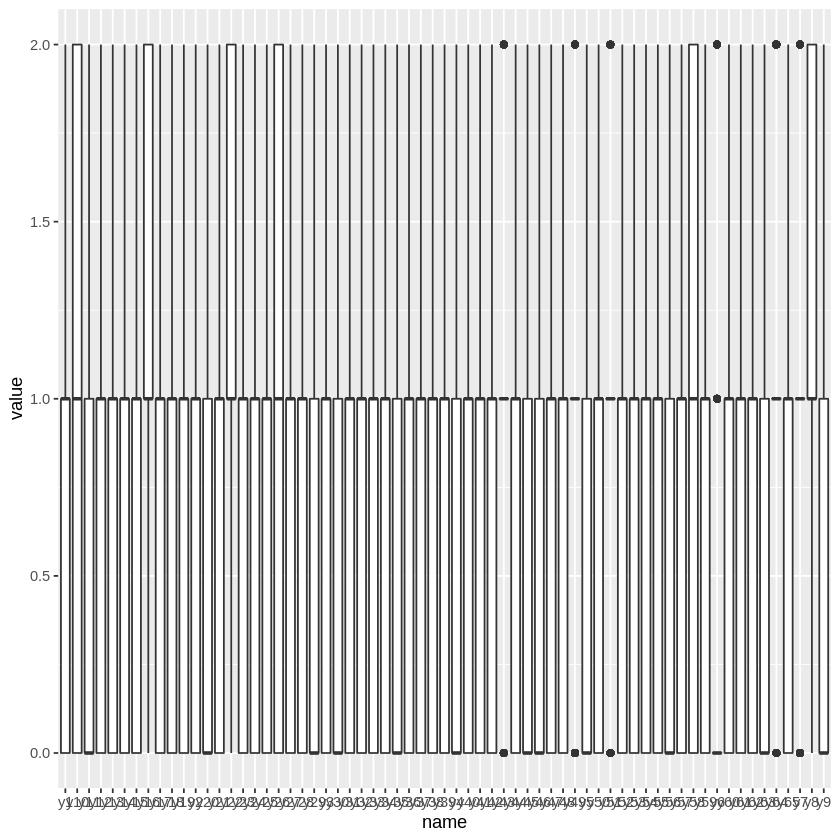

In [ ]:
ds %>% select(y1:y65) %>% pivot_longer(everything()) %>% ggplot(., aes(name, value)) + geom_boxplot()

## Fidedignidade e tabela descritiva

In [ ]:
ds %>% select(y1:y65) %>% alpha(.)

In [ ]:
tabela_descritiva <- ds %>% select(y1:y65) %>% alpha(.)
tabela_descritiva

In [ ]:
tabela_descritiva$item.stats %>% data.frame() %>% select(mean, sd, r.drop) %>% arrange(r.drop)

In [ ]:
ds %>% select(y1:y65) %>% omega(.)

## Análise fatorial exploratória

In [ ]:
ds %>% select(y1:y65) %>% bartlett.test(.)


	Bartlett test of homogeneity of variances

data:  .
Bartlett's K-squared = 3381.3, df = 64, p-value < 2.2e-16


In [ ]:
ds %>% select(y1:y65) %>% KMO(.)

Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = .)
Overall MSA =  0.97
MSA for each item = 
  y1   y2   y3   y4   y5   y6   y7   y8   y9  y10  y11  y12  y13  y14  y15  y16 
0.96 0.97 0.97 0.97 0.97 0.95 0.98 0.97 0.97 0.97 0.96 0.96 0.98 0.97 0.98 0.98 
 y17  y18  y19  y20  y21  y22  y23  y24  y25  y26  y27  y28  y29  y30  y31  y32 
0.97 0.98 0.97 0.96 0.97 0.95 0.97 0.98 0.97 0.95 0.98 0.98 0.87 0.83 0.97 0.97 
 y33  y34  y35  y36  y37  y38  y39  y40  y41  y42  y43  y44  y45  y46  y47  y48 
0.94 0.97 0.97 0.97 0.98 0.96 0.94 0.96 0.95 0.98 0.96 0.98 0.98 0.95 0.98 0.96 
 y49  y50  y51  y52  y53  y54  y55  y56  y57  y58  y59  y60  y61  y62  y63  y64 
0.96 0.97 0.70 0.97 0.98 0.97 0.96 0.96 0.97 0.96 0.98 0.97 0.98 0.97 0.98 0.87 
 y65 
0.96 

In [ ]:
cor_poly <- polychoric(ds %>% select(y1:y65))

In [ ]:
cor_poly

Call: polychoric(x = ds %>% select(y1:y65))
Polychoric correlations 
    y1    y2    y3    y4    y5    y6    y7    y8    y9    y10   y11  
y1   1.00                                                            
y2   0.49  1.00                                                      
y3   0.37  0.42  1.00                                                
y4   0.38  0.42  0.62  1.00                                          
y5   0.34  0.47  0.42  0.51  1.00                                    
y6   0.44  0.38  0.33  0.35  0.37  1.00                              
y7   0.38  0.48  0.38  0.41  0.43  0.39  1.00                        
y8   0.39  0.33  0.39  0.38  0.30  0.31  0.44  1.00                  
y9   0.20  0.51  0.30  0.33  0.37  0.29  0.38  0.34  1.00            
y10  0.30  0.35  0.29  0.30  0.30  0.37  0.36  0.46  0.32  1.00      
y11  0.24  0.21  0.29  0.52  0.36  0.30  0.36  0.31  0.21  0.29  1.00
y12  0.41  0.25  0.36  0.40  0.28  0.32  0.37  0.60  0.23  0.40  0.37
y13  0.32  0.42  0.28

In [ ]:
rho <- cor_poly$rho

Warning message in fa.parallel(rho):
“It seems as if you are using a correlation matrix, but have not specified the number of cases. The number of subjects is arbitrarily set to be 100  ”


Parallel analysis suggests that the number of factors =  3  and the number of components =  2 


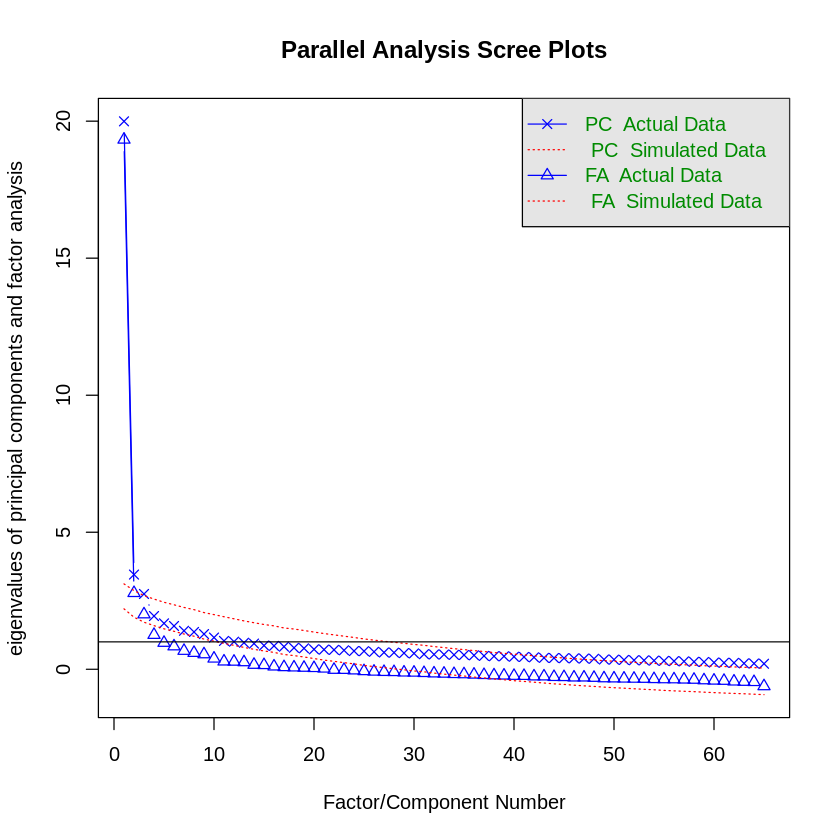

In [ ]:
fa.parallel(rho)

In [ ]:
mod_efa <- fa(ds %>% select(y1:y65), nfactors = 3, cor = "poly", fm = "wls", rotate = "geominQ")
mod_efa$loadings

Loading required namespace: GPArotation

Warning message in fac(r = r, nfactors = nfactors, n.obs = n.obs, rotate = rotate, :
“I am sorry, to do these rotations requires the GPArotation package to be installed”



Loadings:
    WLS1   WLS2   WLS3  
y1   0.539  0.257 -0.270
y2   0.604  0.345       
y3   0.637 -0.253       
y4   0.697 -0.228       
y5   0.594              
y6   0.495  0.199 -0.191
y7   0.603  0.124 -0.132
y8   0.588        -0.326
y9   0.509  0.215       
y10  0.544        -0.248
y11  0.518 -0.142       
y12  0.576        -0.385
y13  0.541  0.241  0.136
y14  0.628 -0.198       
y15  0.623              
y16  0.733 -0.121 -0.233
y17  0.556        -0.309
y18  0.615 -0.237       
y19  0.637 -0.387       
y20  0.565  0.289 -0.176
y21  0.625 -0.442       
y22  0.519 -0.274       
y23  0.650 -0.391       
y24  0.624 -0.234  0.120
y25  0.632 -0.245 -0.102
y26  0.586        -0.368
y27  0.602  0.256       
y28  0.639 -0.271  0.103
y29  0.415         0.315
y30  0.370         0.373
y31  0.561  0.307  0.250
y32  0.525         0.145
y33  0.316  0.210  0.184
y34  0.521         0.218
y35  0.519  0.302  0.238
y36  0.453         0.185
y37  0.636  0.188  0.164
y38  0.489  0.203  0.301
y39  0.319    

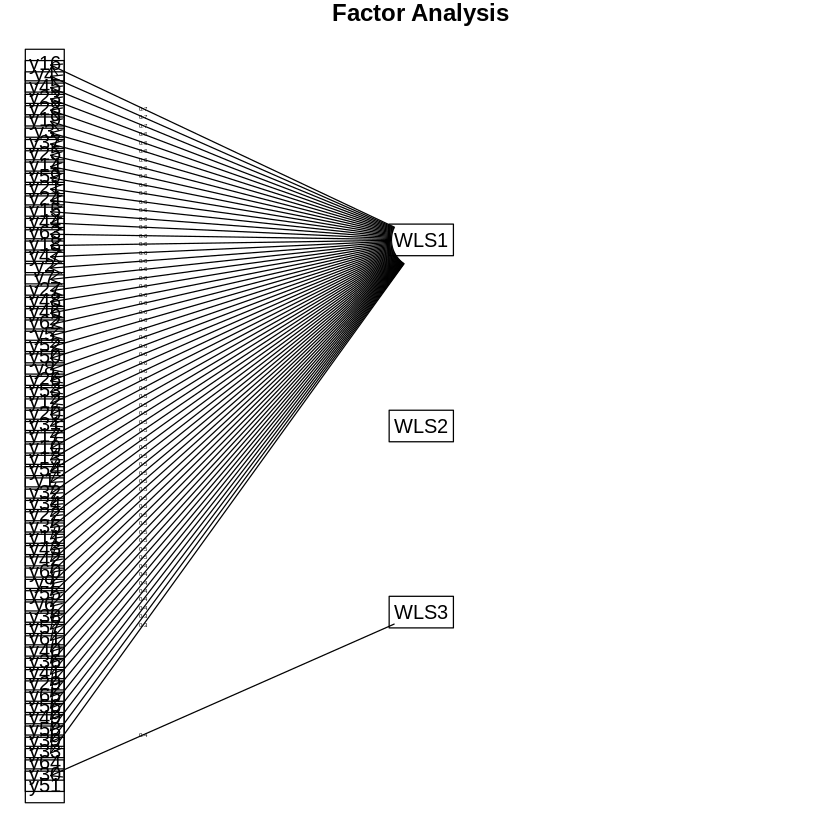

In [ ]:
fa.diagram(mod_efa)

# Analise fatorial confirmatória

## Subset

In [ ]:
set.seed(123)
ife_65_650 <- ds %>% select(y1:y65) %>% sample_n(., 650)

In [ ]:
ife_65_650 %>% head()

,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,⋯,y56,y57,y58,y59,y60,y61,y62,y63,y64,y65
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,1,0,0,0,0,1,1,0,1,⋯,1,1,0,0,1,1,0,0,1,1
2,0,1,0,0,0,1,0,0,0,0,⋯,0,1,0,0,0,1,0,0,0,2
3,0,0,1,0,0,0,0,1,0,0,⋯,0,2,2,1,1,1,0,0,2,1
4,0,0,0,0,0,0,1,0,0,0,⋯,1,1,0,0,0,0,0,0,1,1
5,0,1,0,0,0,0,0,1,1,0,⋯,0,0,0,0,0,0,0,0,0,0
6,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1


In [ ]:
#create the model
mod_cfa_pais <- 'metacog1	=~ y12 + y26 + y8 + y1 + y17 + y20 + y10 + y47 + y48 + y60 + y55 + y6 + y7 + y57
regulacao	=~ y21 + y23 + y19 + y52 + y28 + y3 + y4 + y50 + y45 + y24 + y25 + y22 + y18 + y54 + y59 + y14 + y42 + y16 + y11 + y53 + y58 + y32
metacog2 =~ y30 + y41 + y31 + y29 + y35 + y38 + y37 + y2 + y40 + y13 + y46 + y43 + y62 + y44 + y9 + y27 + y33 + y39 + y65 + y34 + y36 + y56 + y5'
#run the model

cfa_pais <- cfa(mod_cfa_pais, #model name
                  data=ife_65_650, #dataset
                  estimator = 'WLSMV', #method for extracting factors
                  orthogonal=FALSE,
                  ordered=names(ife_65_650))

In [ ]:
summary(cfa_pais, standardized=TRUE, fit.measures=TRUE, modindices=FALSE)

lavaan 0.6-7 ended normally after 63 iterations

  Estimator                                       DWLS
  Optimization method                           NLMINB
  Number of free parameters                        180
                                                      
  Number of observations                           650
                                                      
Model Test User Model:
                                              Standard      Robust
  Test Statistic                              4641.739    3851.493
  Degrees of freedom                              1649        1649
  P-value (Chi-square)                           0.000       0.000
  Scaling correction factor                                  1.603
  Shift parameter                                          956.213
       simple second-order correction                             

Model Test Baseline Model:

  Test statistic                             98537.774   24040.949
  Degrees of freedom             

In [ ]:
parameterEstimates(cfa_pais, standardized=TRUE) %>% 
  filter(op == "=~") %>% 
  select('Dimensão'=lhs, Item=rhs, B=est, SE=se, Z=z, 'p-valor'=pvalue, Beta=std.all) -> tabela_cfa_pais


In [ ]:
tabela_cfa_pais <- tabela_cfa_pais %>% 
  arrange(Dimensão,desc(Beta))
tabela_cfa_pais

In [ ]:
reliability(cfa_pais)

For constructs with categorical indicators, the alpha and the average variance extracted are calculated from polychoric (polyserial) correlations, not from Pearson correlations.




,metacog1,regulacao,metacog2
alpha,0.8934961,0.9363515,0.9089359
omega,0.6889540,0.8359318,0.7831156
omega2,0.6889540,0.8359318,0.7831156
omega3,0.6847304,0.8272082,0.8318451
avevar,0.3959269,0.4185372,0.3238463


# Tabela de normas

In [ ]:
lm(parents_total ~ factor(sex) * age, ds) %>% summary()

In [ ]:
ds %>%
  group_by(age_group) %>% #grouping
  summarise_at(vars(parents_total),
               list(mean = mean, 
                    sd = sd,
                    p90 = ~quantile(., .9),
                    p95 = ~quantile(., .95),
                    sample = ~sum(!is.na(.))))

age_group,mean,sd,p90,p95,sample
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
"(10,12]",43.38828,20.46382,70.8,77.4,273
"(12,14]",42.50000,21.90103,72.5,81.3,88
"(14,16]",39.54167,19.30113,66.9,72.0,72
"(16,18]",31.13636,18.04206,56.7,60.0,44
"(6,8]",44.60326,19.69082,70.8,79.0,983
"(8,10]",43.40892,19.64603,70.0,76.0,807
"[5,6]",44.19961,18.91070,69.0,77.0,1017


# Comparação entre grupos

In [ ]:
lm(parents_total ~ factor(group), data = ds_full) %>% summary()


Call:
lm(formula = parents_total ~ factor(group), data = ds_full)

Residuals:
    Min      1Q  Median      3Q     Max 
-43.736 -14.736  -0.736  13.264  69.264 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)            74.982      1.517   49.43   <2e-16 ***
factor(group)typical  -31.246      1.555  -20.10   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 19.49 on 3447 degrees of freedom
Multiple R-squared:  0.1049,	Adjusted R-squared:  0.1046 
F-statistic:   404 on 1 and 3447 DF,  p-value: < 2.2e-16


`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



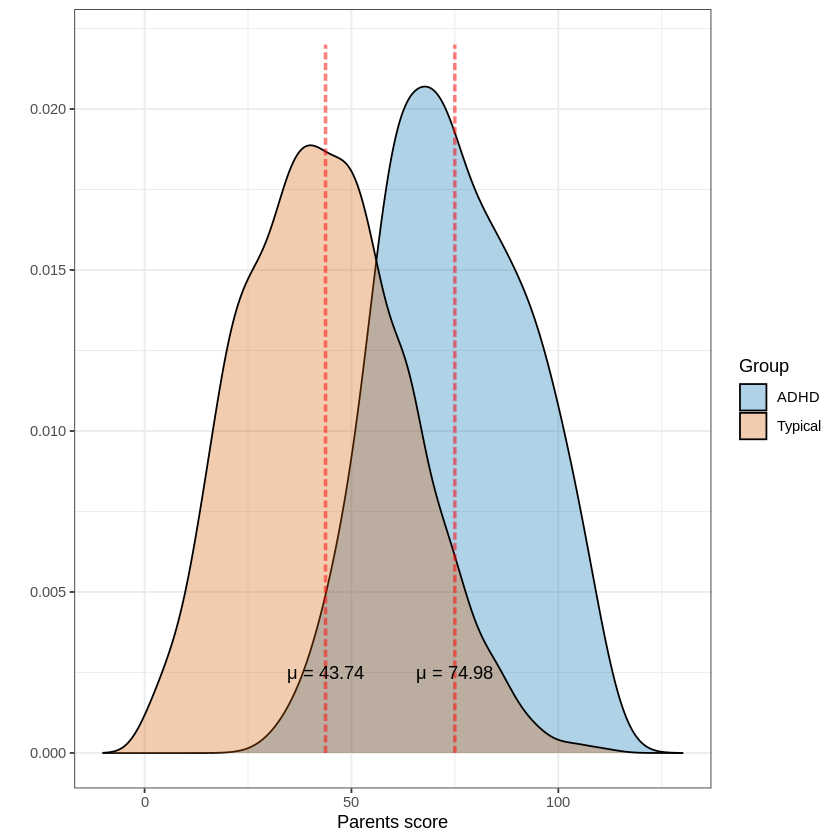

In [ ]:
ggplot(ds_full, aes(x = parents_total, group =  group, fill = group)) +
  geom_density() +
  scale_fill_manual(values = c("#0072B250","#D55E0050"), labels = c("ADHD", "Typical")) +
   geom_segment(data = ds_full %>%
                  group_by(group) %>% 
                  summarize(mean = mean(parents_total), sd = sd(parents_total)), aes(x = mean, xend = mean, y = 0, yend = 0.022),
                size = 1, alpha=0.5, lty="21", color = "red") + 
  geom_text(data = ds_full %>%
              group_by(group) %>% 
              summarize(mean = mean(parents_total), sd = sd(parents_total)), 
            aes(x = mean, y = 0.005,label = paste0("μ = ",round(mean, 2))),position = position_stack(vjust = .5)) +
  theme_bw() +
  xlim(-10,130) +
  labs(x = "Parents score", y = "", fill = "Group")